In [14]:
import HH4b.utils as utils

import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

In [2]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [55]:
vpt_axis = hist.axis.Regular(40, 0, 1000, name="pt", label="Gen Higgs pT")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)

In [53]:
MAIN_DIR = "/eos/uscms/store/user/cmantill/bbbb/skimmer/"
dir_name = "24May1VJets_v12_pre-sel"
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
samples = {
    "Wto2Q-2Jets_PTQQ-100-200": [
        "Wto2Q-2Jets_PTQQ-100to200_1J",
        "Wto2Q-2Jets_PTQQ-100to200_2J",
    ],
    "Wto2Q-2Jets_PTQQ-200-400": [
        "Wto2Q-2Jets_PTQQ-200to400_1J",
        "Wto2Q-2Jets_PTQQ-200to400_2J",
    ],
    "Wto2Q-2Jets_PTQQ-400-600": [
        "Wto2Q-2Jets_PTQQ-400to600_1J",
        "Wto2Q-2Jets_PTQQ-400to600_2J",
    ],
    "Wto2Q-2Jets_PTQQ-600": [
        "Wto2Q-2Jets_PTQQ-600_1J",
        "Wto2Q-2Jets_PTQQ-600_2J",
    ],
    "Zto2Q-2Jets_PTQQ-100-200": [
        "Zto2Q-2Jets_PTQQ-100to200_1J",
        "Zto2Q-2Jets_PTQQ-100to200_2J",
    ],
    "Zto2Q-2Jets_PTQQ-200-400": [
        "Zto2Q-2Jets_PTQQ-200to400_1J",
        "Zto2Q-2Jets_PTQQ-200to400_2J",
    ],
    "Zto2Q-2Jets_PTQQ-400-600": [
        "Zto2Q-2Jets_PTQQ-400to600_1J",
        "Zto2Q-2Jets_PTQQ-400to600_2J",
    ],
    "Zto2Q-2Jets_PTQQ-600": [
        "Zto2Q-2Jets_PTQQ-600_1J",
        "Zto2Q-2Jets_PTQQ-600_2J",
    ],
    "Wto2Q_LO": [
        "Wto2Q-3Jets_HT-200to400",
        "Wto2Q-3Jets_HT-200to400",
        "Wto2Q-3Jets_HT-200to400",
        "Wto2Q-3Jets_HT-800",
    ],
    "Zto2Q_LO": [
        "Zto2Q-4Jets_HT-200to400",
        "Zto2Q-4Jets_HT-200to400",
        "Zto2Q-4Jets_HT-200to400",
        "Zto2Q-4Jets_HT-800",
    ],
    # "WtoLNu_LO": [
    #     "WtoLNu-2Jets",
    # ],
    # "WtoLNu_NLO": [
    #     "WtoLNu-4Jets",
    # ],
    # "DYto2L_LO": [
    #     "DYto2L-2Jets_MLL-50"
    # ],
}
dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    ("GenVPt", 1),
    # ("bbFatJetPNetTXbb", 2),
]

events_dict = {}
years = ["2022EE"]
for year in years:
    events_dict[year] = {}
    for input_dir, samples in dirs.items():
        events_dict[year] = {
            **events_dict[year],
            **utils.load_samples(
                input_dir,
                samples,
                year,
                variations=False,
                reorder_txbb=False,
                txbb="bbFatJetPNetTXbb",
                columns=utils.format_columns(load_columns),
            ),
        }

Loaded Wto2Q-2Jets_PTQQ-100to200_1J                      : 2767 entries
Loaded Wto2Q-2Jets_PTQQ-100to200_2J                      : 414787 entries
Loaded Wto2Q-2Jets_PTQQ-200to400_1J                      : 1487559 entries
Loaded Wto2Q-2Jets_PTQQ-200to400_2J                      : 5567989 entries
Loaded Wto2Q-2Jets_PTQQ-400to600_1J                      : 840892 entries
Loaded Wto2Q-2Jets_PTQQ-400to600_2J                      : 3215976 entries
Loaded Wto2Q-2Jets_PTQQ-600_1J                           : 1094827 entries
Loaded Wto2Q-2Jets_PTQQ-600_2J                           : 1216883 entries
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 458 entries
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      : 94696 entries
Loaded Zto2Q-2Jets_PTQQ-200to400_1J                      : 810648 entries
Loaded Zto2Q-2Jets_PTQQ-200to400_2J                      : 2754840 entries
Loaded Zto2Q-2Jets_PTQQ-400to600_1J                      : 960121 entries
Loaded Zto2Q-2Jets_PTQQ-400to600_2J   

In [24]:
def plot_h(hists, labels, density, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    for hkey, h in hists.items():
        hep.histplot(h, ax=ax, label=labels[hkey], density=density)
    ax.legend(title=f"Pre-Selection")
    if density:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("Events")
    ax.set_title(title)
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")

In [56]:
h_vpt = hist.Hist(vpt_axis, cat_axis)
events = events_dict["2022EE"]
for sample in events:
    weight = events[sample]["finalWeight"]
    vpt = events[sample]["GenVPt"][0]
    h_vpt.fill(vpt, sample, weight=weight)

In [37]:
h_vpt

Hist(
  Regular(40, 0, 1000, name='pt', label='Gen Higgs pT'),
  StrCategory(['Wto2Q-2Jets_PTQQ-100-200', 'Wto2Q-2Jets_PTQQ-200-400', 'Wto2Q-2Jets_PTQQ-400-600', 'Wto2Q-2Jets_PTQQ-600', 'Zto2Q-2Jets_PTQQ-100-200', 'Zto2Q-2Jets_PTQQ-200-400', 'Zto2Q-2Jets_PTQQ-400-600', 'Zto2Q-2Jets_PTQQ-600', 'Wto2Q_LO', 'Zto2Q_LO'], growth=True, name='cat'),
  storage=Double()) # Sum: 1223837.7764614155 (1229011.9580468093 with flow)

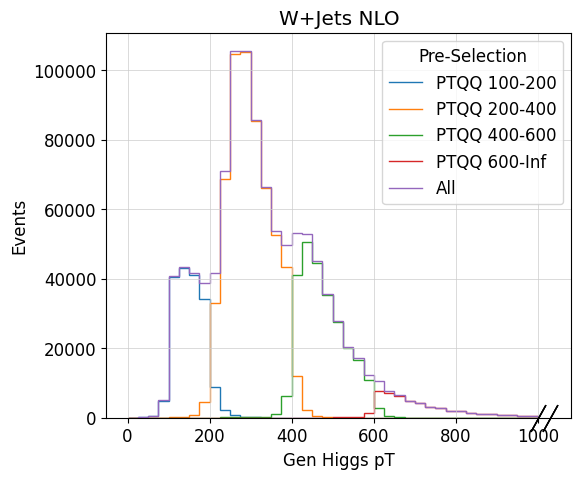

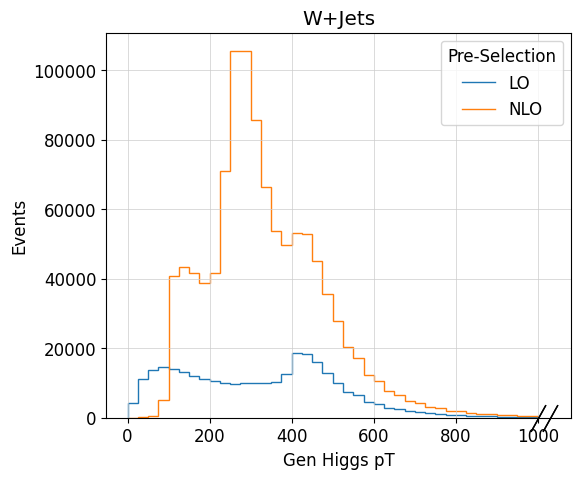

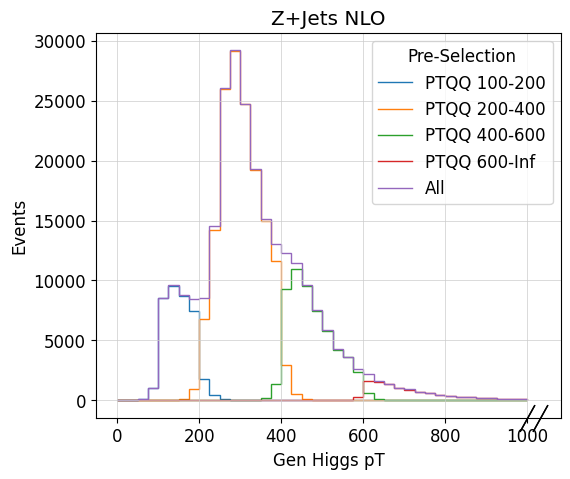

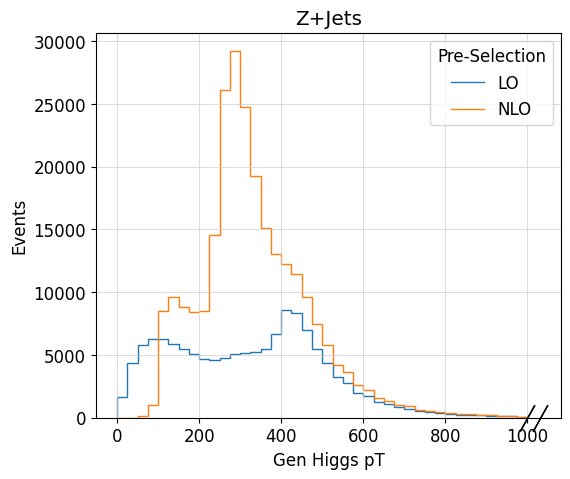

In [62]:
h_to_plot = h_vpt

for v in ["W", "Z"]:
    hists = {
        "100to200": h_to_plot[{"cat": f"{v}to2Q-2Jets_PTQQ-100-200"}],
        "200to400": h_to_plot[{"cat": f"{v}to2Q-2Jets_PTQQ-200-400"}],
        "400to600": h_to_plot[{"cat": f"{v}to2Q-2Jets_PTQQ-400-600"}],
        "600": h_to_plot[{"cat": f"{v}to2Q-2Jets_PTQQ-600"}],
    }
    hists["sum"] = sum([h for h in hists.values()])
    labels = {
        "100to200": "PTQQ 100-200",
        "200to400": "PTQQ 200-400",
        "400to600": "PTQQ 400-600",
        "600": "PTQQ 600-Inf",
        "sum": "All",
        "lo": "LO",
        "nlo": "NLO",
    }
    plot_h(hists, labels, density=False, title=f"{v}+Jets NLO")

    hists["lo"] = h_to_plot[{"cat": f"{v}to2Q_LO"}]
    plot_h({"lo": hists["lo"], "nlo": hists["sum"]}, labels, density=False, title=f"{v}+Jets")